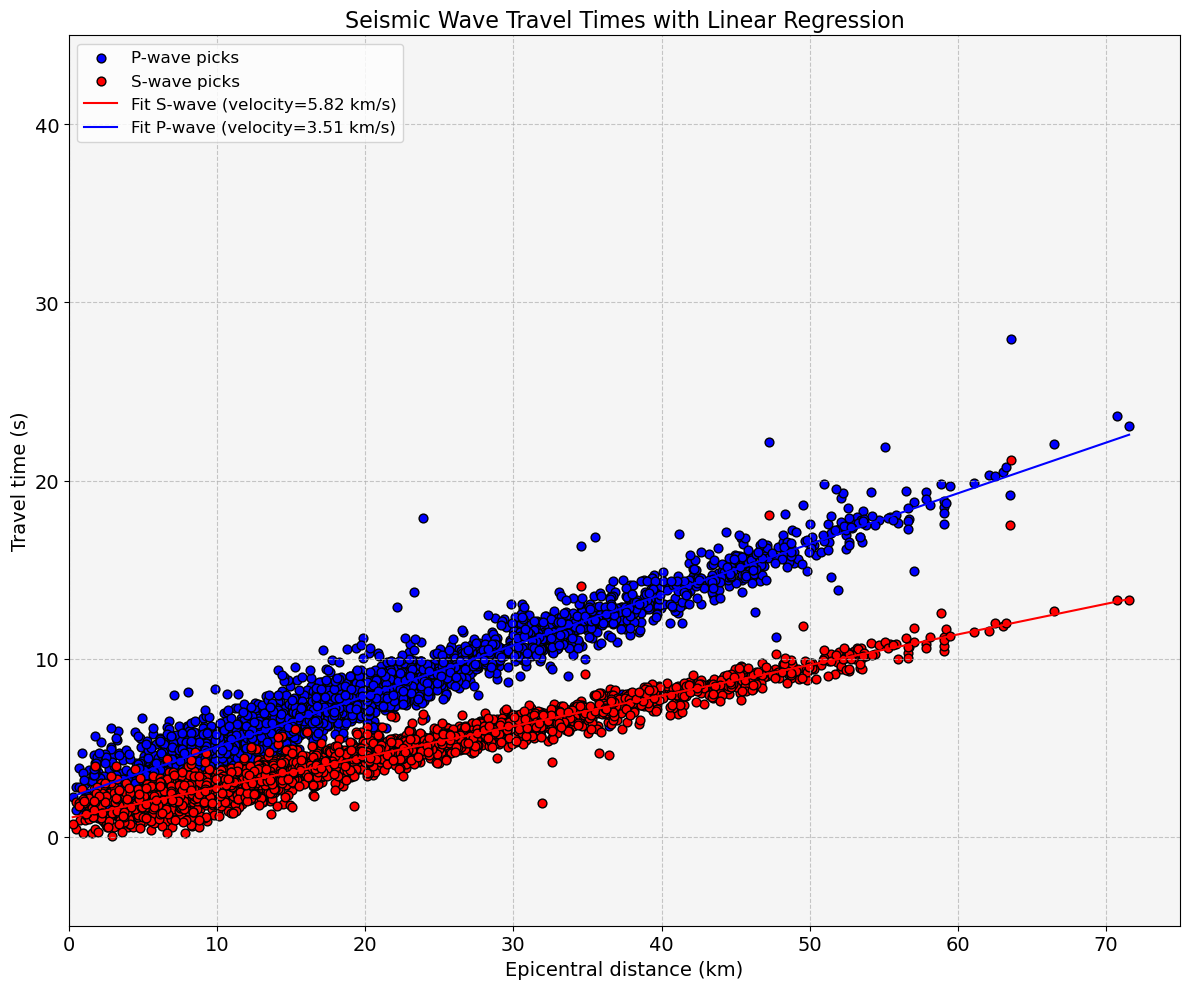

Velocity for S-wave: 5.82 km/s
Velocity for P-wave: 3.51 km/s
Vp/Vs ratio: 0.60


In [1]:

### First Check
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from scipy import stats

def get_sac_header_values(sac_file_path):
    try:
        st = read(sac_file_path)
        tr = st[0]
        o_value = tr.stats.sac.o
        t1_value = tr.stats.sac.t1
        t2_value = tr.stats.sac.t2
        dist_value = tr.stats.sac.dist
        return o_value, t1_value, t2_value, dist_value
    except Exception as e:
        print(f"Error processing file {sac_file_path}: {e}")
        return None, None, None, None

def process_sac_directory(directory_path):
    t1_minus_o = []
    t2_minus_o = []
    dists = []
    filenames = []

    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} does not exist.")
        return pd.DataFrame()

    with os.scandir(directory_path) as entries:
        for entry in entries:
            if entry.is_file() and entry.name.endswith(".SAC"):
                sac_file_path = entry.path
                o_value, t1_value, t2_value, dist_value = get_sac_header_values(sac_file_path)
                if None not in (o_value, t1_value, t2_value, dist_value):
                    t1_minus_o_value = t1_value - o_value
                    t2_minus_o_value = t2_value - o_value
                    if t1_minus_o_value > 0 and t2_minus_o_value > 0:
                        t1_minus_o.append(t1_minus_o_value)
                        t2_minus_o.append(t2_minus_o_value)
                        dists.append(dist_value)
                        filenames.append(entry.name)

    df = pd.DataFrame({
        "Filename": filenames,
        "Distance": dists,
        "t1_minus_O": t1_minus_o,
        "t2_minus_O": t2_minus_o,
    })

    return df

def plot_data(df):
    plt.figure(figsize=(12, 10))

    # Perform linear regression
    slope_p, intercept_p, _, _, _ = stats.linregress(df['Distance'], df['t2_minus_O'])
    slope_s, intercept_s, _, _, _ = stats.linregress(df['Distance'], df['t1_minus_O'])

    plt.scatter(df['Distance'], df['t2_minus_O'], color="blue", label="P-wave picks", marker="o", s=40, edgecolor="black")
    plt.scatter(df['Distance'], df['t1_minus_O'], color="red", label="S-wave picks", marker="o", s=40, edgecolor="black")

    # Plot regression lines
    x = np.array([min(df['Distance']), max(df['Distance'])])
    plt.plot(x, slope_s * x + intercept_s, "r-", label=f"Fit S-wave (velocity={1/slope_s:.2f} km/s)")
    plt.plot(x, slope_p * x + intercept_p, "b-", label=f"Fit P-wave (velocity={1/slope_p:.2f} km/s)")

    plt.xlabel("Epicentral distance (km)", fontsize=14)
    plt.ylabel("Travel time (s)", fontsize=14)
    plt.title("Seismic Wave Travel Times with Linear Regression", fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='upper left')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    # set axis limits
    plt.ylim(-5, 45)  
    plt.xlim(0, 75)  
    ax = plt.gca()
    ax.set_facecolor("whitesmoke")
    plt.gcf().set_facecolor("white")

    plt.tight_layout()
    plt.show()

    return 1/slope_s, 1/slope_p

if __name__ == "__main__":
    sac_directory_path = "./NAFZ_final_sac"

    df = process_sac_directory(sac_directory_path)

    if df.empty:
        print("No data to plot. Please check if any SAC files were successfully processed.")
    else:
        velocity_s, velocity_p = plot_data(df)
        print(f"Velocity for S-wave: {velocity_s:.2f} km/s")
        print(f"Velocity for P-wave: {velocity_p:.2f} km/s")
        print(f"Vp/Vs ratio: {velocity_p/velocity_s:.2f}")


Saved sorted normal data to: ./NAFZ_F_SAC/results/sac_data_filtered.csv
Saved sorted outlier data to: ./NAFZ_F_SAC/results/sac_data_outliers.csv


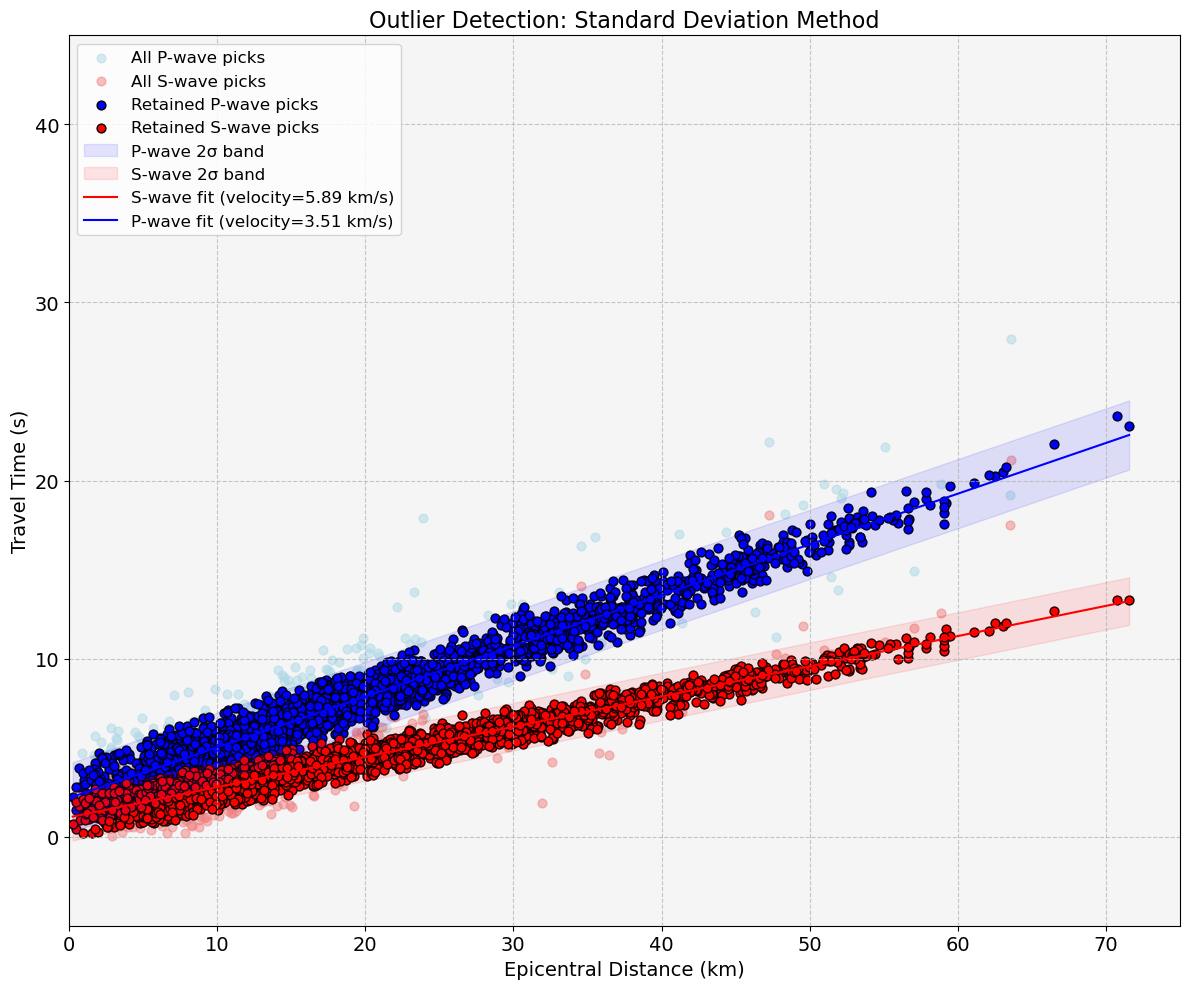

Velocity for S-wave: 5.89 km/s
Velocity for P-wave: 3.51 km/s
Vp/Vs ratio: 0.60
Copied SAC file: 2012.136.13.35.56.000.YH.DC10..BHZ.SAC
Copied SAC file: 2012.136.13.35.56.000.YH.DD09..BHZ.SAC
Copied SAC file: 2012.136.13.35.56.000.YH.DD10..BHZ.SAC
Copied SAC file: 2012.136.13.35.56.000.YH.DD11..BHZ.SAC
Copied SAC file: 2012.136.13.35.56.000.YH.DF07..BHZ.SAC
Copied SAC file: 2012.136.13.35.56.000.YH.DF10..BHZ.SAC
Copied SAC file: 2012.137.11.51.08.000.YH.DA01..BHZ.SAC
Copied SAC file: 2012.137.11.51.08.000.YH.DB01..BHZ.SAC
Copied SAC file: 2012.137.11.51.08.000.YH.DC02..BHZ.SAC
Copied SAC file: 2012.137.11.51.08.000.YH.DE03..BHZ.SAC
Copied SAC file: 2012.137.13.05.51.000.YH.DA05..BHZ.SAC
Copied SAC file: 2012.137.13.05.51.000.YH.DB05..BHZ.SAC
Copied SAC file: 2012.138.12.09.12.000.YH.DA05..BHZ.SAC
Copied SAC file: 2012.138.12.09.12.000.YH.DA06..BHZ.SAC
Copied SAC file: 2012.138.12.09.12.000.YH.DB05..BHZ.SAC
Copied SAC file: 2012.138.15.07.25.000.YH.DA05..BHZ.SAC
Copied SAC file: 2012.13

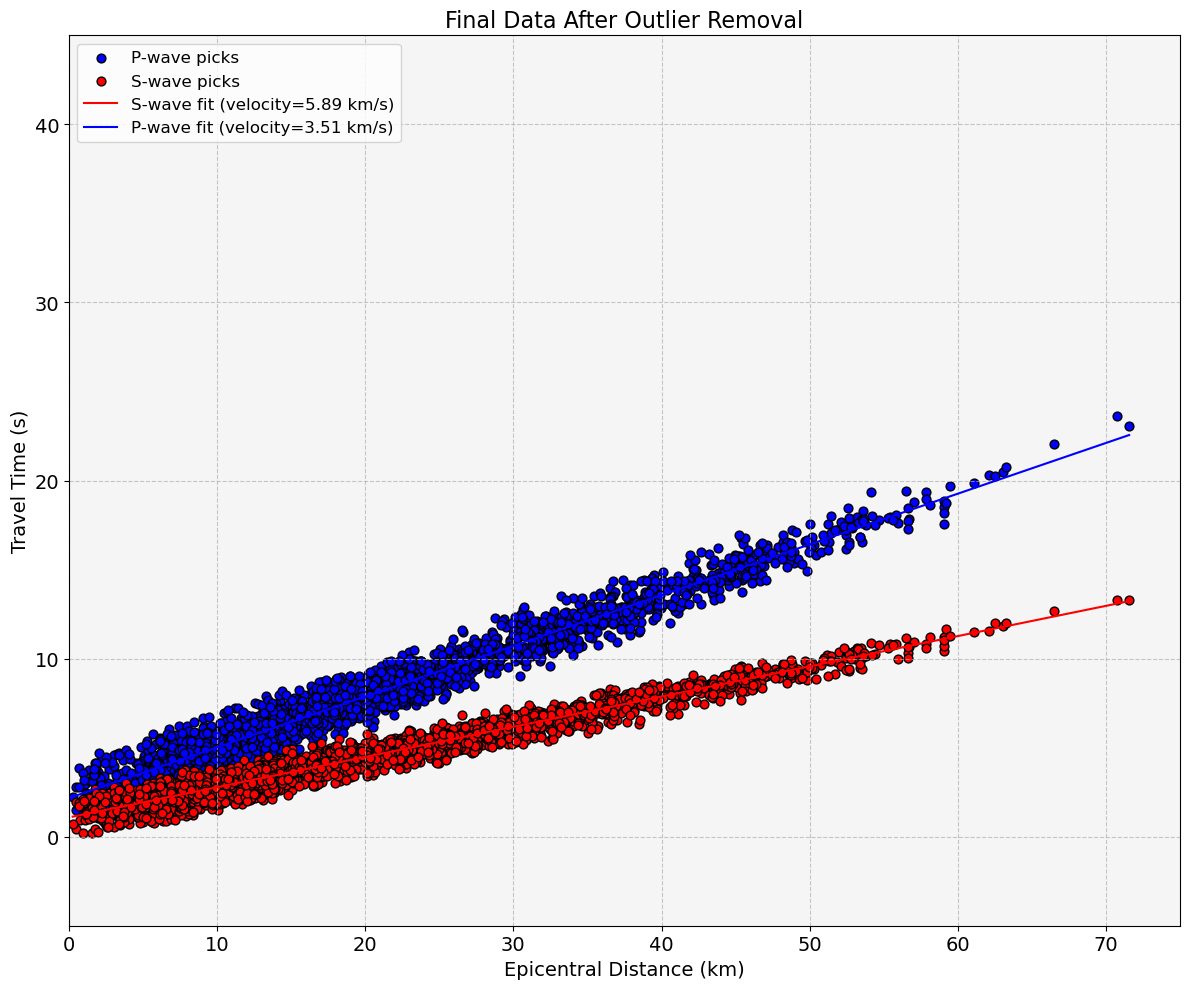

Final velocity for S-wave: 5.89 km/s
Final velocity for P-wave: 3.51 km/s
Final Vp/Vs ratio: 0.60


In [3]:
### Second Check

import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from obspy import read  
from scipy import stats  
import shutil  

def get_sac_header_values(sac_file_path):  
    try:  
        st = read(sac_file_path)  
        tr = st[0]  
        o_value = tr.stats.sac.o  
        t1_value = tr.stats.sac.t1  
        t2_value = tr.stats.sac.t2  
        dist_value = tr.stats.sac.dist  
        return o_value, t1_value, t2_value, dist_value  
    except Exception as e:  
        print(f"Error processing file {sac_file_path}: {e}")  
        return None, None, None, None  

def remove_outliers_slope_shift(df, p_shift, s_shift):  
    slope_p, intercept_p, _, _, _ = stats.linregress(df['Distance'], df['t2_minus_O'])  
    slope_s, intercept_s, _, _, _ = stats.linregress(df['Distance'], df['t1_minus_O'])  
    
    df['P_lower'] = slope_p * df['Distance'] + intercept_p - p_shift / slope_p  
    df['P_upper'] = slope_p * df['Distance'] + intercept_p + p_shift / slope_p  
    df['S_lower'] = slope_s * df['Distance'] + intercept_s - s_shift / slope_s  
    df['S_upper'] = slope_s * df['Distance'] + intercept_s + s_shift / slope_s  
    
    normal_df = df[(df['t2_minus_O'] >= df['P_lower']) &   
                   (df['t2_minus_O'] <= df['P_upper']) &   
                   (df['t1_minus_O'] >= df['S_lower']) &   
                   (df['t1_minus_O'] <= df['S_upper'])]  
    
    outlier_df = df[~df.index.isin(normal_df.index)]  
    
    return normal_df, outlier_df, slope_p, intercept_p, slope_s, intercept_s  

def remove_outliers_std_dev(df, std_dev_threshold=3):  
    def calc_residuals(x, y, slope, intercept):  
        return y - (slope * x + intercept)  

    slope_p, intercept_p, _, _, _ = stats.linregress(df['Distance'], df['t2_minus_O'])  
    slope_s, intercept_s, _, _, _ = stats.linregress(df['Distance'], df['t1_minus_O'])  
    
    p_residuals = calc_residuals(df['Distance'], df['t2_minus_O'], slope_p, intercept_p)  
    s_residuals = calc_residuals(df['Distance'], df['t1_minus_O'], slope_s, intercept_s)  
    
    p_std = np.std(p_residuals)  
    s_std = np.std(s_residuals)  
    
    normal_mask = (np.abs(p_residuals) <= std_dev_threshold * p_std) & \
                  (np.abs(s_residuals) <= std_dev_threshold * s_std)  
    
    normal_df = df[normal_mask]  
    outlier_df = df[~normal_mask]  
    
    return normal_df, outlier_df, slope_p, intercept_p, slope_s, intercept_s  

def remove_outliers_and_regress(df, method, **kwargs):  
    if method == "slope_shift":  
        normal_df, outlier_df, _, _, _, _ = remove_outliers_slope_shift(df, kwargs['p_shift'], kwargs['s_shift'])  
    elif method == "std_dev":  
        normal_df, outlier_df, _, _, _, _ = remove_outliers_std_dev(df, kwargs['std_dev_threshold'])  
    else:  
        raise ValueError("Invalid method specified")  

    # Linear regression on filtered data  
    slope_p, intercept_p, _, _, _ = stats.linregress(normal_df['Distance'], normal_df['t2_minus_O'])  
    slope_s, intercept_s, _, _, _ = stats.linregress(normal_df['Distance'], normal_df['t1_minus_O'])  

    return normal_df, outlier_df, slope_p, intercept_p, slope_s, intercept_s  

def process_sac_directory(directory_path, csv_file_path, outlier_file_path, method, **kwargs):  
    t1_minus_o = []  
    t2_minus_o = []  
    dists = []  
    filenames = []  

    if not os.path.exists(directory_path):  
        print(f"Directory {directory_path} does not exist.")  
        return [], [], []  

    with os.scandir(directory_path) as entries:  
        for entry in entries:  
            if entry.is_file() and entry.name.endswith(".SAC"):  
                sac_file_path = entry.path  
                o_value, t1_value, t2_value, dist_value = get_sac_header_values(sac_file_path)  
                if None not in (o_value, t1_value, t2_value, dist_value):  
                    t1_minus_o_value = t1_value - o_value  
                    t2_minus_o_value = t2_value - o_value  
                    if t1_minus_o_value > 0 and t2_minus_o_value > 0:  
                        t1_minus_o.append(t1_minus_o_value)  
                        t2_minus_o.append(t2_minus_o_value)  
                        dists.append(dist_value)  
                        filenames.append(entry.name)  

    df = pd.DataFrame({  
        "Filename": filenames,  
        "Distance": dists,  
        "t1_minus_O": t1_minus_o,  
        "t2_minus_O": t2_minus_o,  
    })  

    normal_df, outlier_df, slope_p, intercept_p, slope_s, intercept_s = remove_outliers_and_regress(df, method, **kwargs)  

    normal_df_sorted = normal_df.sort_values(by='Filename')  
    normal_df_sorted.to_csv(csv_file_path, index=False)  
    
    outlier_df_sorted = outlier_df.sort_values(by='Filename')  
    outlier_df_sorted.to_csv(outlier_file_path, index=False)  

    print(f"Saved sorted normal data to: {csv_file_path}")  
    print(f"Saved sorted outlier data to: {outlier_file_path}")  

    result = (normal_df_sorted['t1_minus_O'].tolist(), normal_df_sorted['t2_minus_O'].tolist(),   
              normal_df_sorted['Distance'].tolist(), slope_p, intercept_p, slope_s, intercept_s)  
    
    return result, df  

def plot_data(t1_minus_o, t2_minus_o, dists, slope_p, intercept_p, slope_s, intercept_s, method, **kwargs):  
    plt.figure(figsize=(12, 10))  

    if method == "std_dev":  
        std_dev_threshold = kwargs['std_dev_threshold']  
        all_data = kwargs['all_data']  
        
        plt.scatter(all_data['Distance'], all_data['t2_minus_O'], color="lightblue", label="All P-wave picks", marker="o", s=40, alpha=0.5)  
        plt.scatter(all_data['Distance'], all_data['t1_minus_O'], color="lightcoral", label="All S-wave picks", marker="o", s=40, alpha=0.5)  
        
        plt.scatter(dists, t2_minus_o, color="blue", label="Retained P-wave picks", marker="o", s=40, edgecolor="black")  
        plt.scatter(dists, t1_minus_o, color="red", label="Retained S-wave picks", marker="o", s=40, edgecolor="black")  

        x = np.array([min(all_data['Distance']), max(all_data['Distance'])])  
        p_std = np.std(all_data['t2_minus_O'] - (slope_p * all_data['Distance'] + intercept_p))  
        s_std = np.std(all_data['t1_minus_O'] - (slope_s * all_data['Distance'] + intercept_s))  
        
        plt.fill_between(x, slope_p * x + intercept_p - std_dev_threshold * p_std,   
                         slope_p * x + intercept_p + std_dev_threshold * p_std,   
                         color='blue', alpha=0.1, label=f'P-wave {std_dev_threshold}σ band')  
        plt.fill_between(x, slope_s * x + intercept_s - std_dev_threshold * s_std,   
                         slope_s * x + intercept_s + std_dev_threshold * s_std,   
                         color='red', alpha=0.1, label=f'S-wave {std_dev_threshold}σ band')  

    elif method == "slope_shift":  
        p_shift, s_shift = kwargs['p_shift'], kwargs['s_shift']  
        plt.scatter(dists, t2_minus_o, color="blue", label="P-wave picks", marker="o", s=40, edgecolor="black")  
        plt.scatter(dists, t1_minus_o, color="red", label="S-wave picks", marker="o", s=40, edgecolor="black")  
        
        x = np.array([min(dists), max(dists)])  
        plt.plot(x, slope_s * x + intercept_s - s_shift / slope_s, "r--", label="S-wave boundaries")  
        plt.plot(x, slope_s * x + intercept_s + s_shift / slope_s, "r--")  
        plt.plot(x, slope_p * x + intercept_p - p_shift / slope_p, "b--", label="P-wave boundaries")  
        plt.plot(x, slope_p * x + intercept_p + p_shift / slope_p, "b--")  

    x = np.array([min(dists), max(dists)])  
    plt.plot(x, slope_s * x + intercept_s, "r-", label=f"S-wave fit (velocity={1/slope_s:.2f} km/s)")  
    plt.plot(x, slope_p * x + intercept_p, "b-", label=f"P-wave fit (velocity={1/slope_p:.2f} km/s)")  

    plt.xlabel("Epicentral Distance (km)", fontsize=14)  
    plt.ylabel("Travel Time (s)", fontsize=14)  
    plt.title(f"Outlier Detection: {'Standard Deviation' if method == 'std_dev' else 'Slope Shift'} Method", fontsize=16)  
    plt.grid(True, linestyle='--', alpha=0.7)  
    plt.legend(fontsize=12, loc='upper left')  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  

    plt.ylim(-5, 45)  
    plt.xlim(0, 75)  
    ax = plt.gca()  
    ax.set_facecolor("whitesmoke")  
    plt.gcf().set_facecolor("white")  

    plt.tight_layout()  
    plt.show()  

    return 1/slope_s, 1/slope_p  

def copy_filtered_files(csv_file_path, source_sac_dir, dest_sac_dir):  
    df = pd.read_csv(csv_file_path)  
    
    os.makedirs(dest_sac_dir, exist_ok=True)  
    
    copied_files = set()  
    
    for _, row in df.iterrows():  
        file_name = row['Filename']  
        
        if file_name in copied_files:  
            continue  
        
        sac_src = os.path.join(source_sac_dir, file_name)  
        sac_dst = os.path.join(dest_sac_dir, file_name)  
        if os.path.exists(sac_src):  
            shutil.copy2(sac_src, sac_dst)  
            print(f"Copied SAC file: {file_name}")  
        else:  
            print(f"SAC file not found: {file_name}")  
        
        copied_files.add(file_name)  
    
    print(f"Copied {len(copied_files)} filtered files in total.")  

def plot_final_data(directory_path):  
    t1_minus_o = []  
    t2_minus_o = []  
    dists = []  

    with os.scandir(directory_path) as entries:  
        for entry in entries:  
            if entry.is_file() and entry.name.endswith(".SAC"):  
                sac_file_path = entry.path  
                o_value, t1_value, t2_value, dist_value = get_sac_header_values(sac_file_path)  
                if None not in (o_value, t1_value, t2_value, dist_value):  
                    t1_minus_o_value = t1_value - o_value  
                    t2_minus_o_value = t2_value - o_value  
                    if t1_minus_o_value > 0 and t2_minus_o_value > 0:  
                        t1_minus_o.append(t1_minus_o_value)  
                        t2_minus_o.append(t2_minus_o_value)  
                        dists.append(dist_value)  

    plt.figure(figsize=(12, 10))  
    plt.scatter(dists, t2_minus_o, color="blue", label="P-wave picks", marker="o", s=40, edgecolor="black")  
    plt.scatter(dists, t1_minus_o, color="red", label="S-wave picks", marker="o", s=40, edgecolor="black")  

    slope_p, intercept_p, _, _, _ = stats.linregress(dists, t2_minus_o)  
    slope_s, intercept_s, _, _, _ = stats.linregress(dists, t1_minus_o)  

    x = np.array([min(dists), max(dists)])  
    plt.plot(x, slope_s * x + intercept_s, "r-", label=f"S-wave fit (velocity={1/slope_s:.2f} km/s)")  
    plt.plot(x, slope_p * x + intercept_p, "b-", label=f"P-wave fit (velocity={1/slope_p:.2f} km/s)")  

    plt.xlabel("Epicentral Distance (km)", fontsize=14)  
    plt.ylabel("Travel Time (s)", fontsize=14)  
    plt.title("Final Data After Outlier Removal", fontsize=16)  
    plt.grid(True, linestyle='--', alpha=0.7)  
    plt.legend(fontsize=12, loc='upper left')  
    plt.xticks(fontsize=14)  
    plt.yticks(fontsize=14)  

    plt.ylim(-5, 45)  
    plt.xlim(0, 75)  
    ax = plt.gca()  
    ax.set_facecolor("whitesmoke")  
    plt.gcf().set_facecolor("white")  

    plt.tight_layout()  
    plt.show()  

    return 1/slope_s, 1/slope_p  

if __name__ == "__main__":  
    sac_directory_path = "./NAFZ_F_SAC"  
    csv_file_path = "./NAFZ_F_SAC/results/sac_data_filtered.csv"  
    outlier_file_path = "./NAFZ_F_SAC/results/sac_data_outliers.csv"  

    p_shift = 1.8  
    s_shift = 0.9  
    std_dev_threshold = 3
    # method = "slope_shift"  
    method = "std_dev"  

    if method == "slope_shift":  
        result, all_data = process_sac_directory(sac_directory_path, csv_file_path, outlier_file_path, "slope_shift", p_shift=p_shift, s_shift=s_shift)  
        plot_kwargs = {'p_shift': p_shift, 's_shift': s_shift, 'all_data': all_data}  
    elif method == "std_dev":  
        result, all_data = process_sac_directory(sac_directory_path, csv_file_path, outlier_file_path, "std_dev", std_dev_threshold=std_dev_threshold)  
        plot_kwargs = {'std_dev_threshold': std_dev_threshold, 'all_data': all_data}  
    else:  
        print("Invalid method specified. Exiting.")  
        exit()  

    if not result[0] or not result[1] or not result[2]:  
        print("No data to plot. Please check if any SAC files were successfully processed.")  
    else:  
        t1_minus_o, t2_minus_o, dists, slope_p, intercept_p, slope_s, intercept_s = result  
        velocity_s, velocity_p = plot_data(t1_minus_o, t2_minus_o, dists, slope_p, intercept_p, slope_s, intercept_s,   
                                           method, **plot_kwargs)  
        print(f"Velocity for S-wave: {velocity_s:.2f} km/s")  
        print(f"Velocity for P-wave: {velocity_p:.2f} km/s")  
        print(f"Vp/Vs ratio: {velocity_p/velocity_s:.2f}")  

    source_sac_dir = "./NAFZ_F_SAC"  
    dest_sac_dir = "./NAFZ_FF_SAC"  

    copy_filtered_files(csv_file_path, source_sac_dir, dest_sac_dir)  

    # Plot final data after outlier removal  
    print("\nPlotting final data after outlier removal...")  
    final_velocity_s, final_velocity_p = plot_final_data(dest_sac_dir)  
    print(f"Final velocity for S-wave: {final_velocity_s:.2f} km/s")  
    print(f"Final velocity for P-wave: {final_velocity_p:.2f} km/s")  
    print(f"Final Vp/Vs ratio: {final_velocity_p/final_velocity_s:.2f}")